### Detecção por Inteligência Artificial de Barras Quebradas em Rotores de Motores de Indução Trifásicos.

Objetivo do projeto - 
Baseado em conceitos de Data Science e IA desenvolver uma ferramenta de Manutenção Preditiva dedicada a diagnosticar barras quebradas em rotores de motores de indução trifásicos.

Link para o dataset:  https://ieee-dataport.org/open-access/experimental-database-detecting-and-diagnosing-rotor-broken-bar-three-phase-induction


Introdução:

O conjunto de dados contém sinais elétricos e mecânicos de experimentos em motores de indução trifásicos. Os ensaios experimentais foram realizados para diferentes cargas mecânicas no eixo do motor de indução e diferentes severidades de defeitos de barra quebrada no rotor do motor, incluindo dados referentes ao rotor sem defeitos. Dez repetições foram realizadas para cada condição experimental.
 
A bancada experimental consiste em um motor de indução trifásico acoplado a uma máquina de corrente contínua, que funciona como um gerador simulando o torque de carga, conectado por um eixo contendo uma chave de torque rotativa.

- Motor de Indução: 1cv, 220V/380V, 3.02A/1.75A, 4 pólos, 60 Hz, com o torque nominal de 4.1 Nm e uma velocidade nominal de 1715 rpm. O rotor é do tipo gaiola de esquilo composto por 34 barras.

- Torque de carga: é ajustado variando a tensão do enrolamento de campo do gerador de corrente contínua. Um variador de tensão monofásico com um retificador de ponte completa filtrado é usado para esse propósito. Um motor de indução foi testado em 12,5, 25, 37,5, 50, 62,5, 75, 87,5 e 100% da carga total.

- Barra do rotor quebrada: para simular a falha no rotor do motor de indução trifásico, foi necessário perfurar o rotor. As barras de rotor de ruptura são geralmente adjacentes à primeira barra de rotor, 4 rotores foram testados, o primeiro com uma barra de quebra, o segundo com duas barras quebradas adjacentes e assim por diante o rotor contendo quatro barras quebradas adjacentes.

Condição de monitoramento:

Todos os sinais foram amostrados ao mesmo tempo por 18 segundos para cada condição de carregamento e dez repetições foram realizadas do transiente para o estado estacionário do motor de indução.

- Sinais mecânicos: foram utilizados cinco acelerômetros axiais simultaneamente, com sensibilidade de 10 mV/mm/s, faixa de frequência de 5 a 2.000 Hz e caixa de aço inoxidável, permitindo medições de vibração tanto na extremidade motriz (DE) quanto na extremidade não motriz (NDE) laterais do motor, axial ou radialmente, nas direções horizontal ou vertical.

- Sinais elétricos: as correntes foram medidas por sondas de corrente alternada, que correspondem a medidores de precisão, com capacidade de até 50ARMS, com tensão de saída de 10 mV/A, correspondente ao modelo Yokogawa 96033. As tensões foram medidas diretamente nos terminais de indução usando pontos de tensão do osciloscópio e do fabricante Yokogawa.

Visão geral do dataset:

-         Tensão trifásica

-         Corrente trifásica

-         Cinco sinais de vibração

Referências:

O banco de dados foi adquirido no Laboratório de Automação Inteligente de Processos e Sistemas e no Laboratório de Controle Inteligente de Máquinas Elétricas da Escola de Engenharia de São Carlos da Universidade de São Paulo (USP), Brasil.
            
Aline Elly Treml, Rogério Andrade Flauzino, Marcelo Suetake, Narco Afonso Ravazzoli Maciejewski, September 15, 2020, "Experimental database for detecting and diagnosing rotor broken bar in a three-phase induction motor.", IEEE Dataport, doi: https://dx.doi.org/10.21227/fmnm-bn95.

## Continuando os estudos sobre a FFT

In [ ]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [2]:
# Verificando o tamanho do dataset a partir do regime permanente.

normal0 = pd.read_csv('arquivos_csv_normal/normal_torque05_0.csv', index_col=0)
normal0 = normal0.Ia[114000:]

#tamanho total do dataset
len(normal0)

C:\Users\linco\anaconda3\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


887000

In [4]:
# Taxa de amostragem
## A taxa de amostragem empregada consiste na quantidade de pontos encontrados anteriormente multiplicado pela 
# frequência de rede elétrica (60Hz), assim, temos:
sample_rate = 49680

# tempo de medição equivalente para todo o dataset
len(normal0) / sample_rate

NameError: name 'normal0' is not defined

In [1]:
# Definição da janela de estudo. Para cada amostra, define-se a análise da FFT em 10 ciclos.

#tempo de cada janela
t = (1/60)*10
t


0.16666666666666666

In [2]:
# Número total de pontos
N = int(t * sample_rate)
N

NameError: name 'sample_rate' is not defined

In [5]:
# Calculando o tempo
time = np.linspace(0, t, N)
time

<AxesSubplot:>

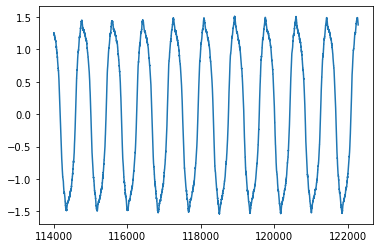

In [6]:
# plot 
normal0[0:N].plot()

In [7]:
# cálculo da frequência
frequency = np.linspace (0.0, sample_rate/2, int (N/2))

In [8]:
# parâmetros para a FFT
yf = rfft(normal0[0:N].values)
xf = rfftfreq(N, 1 / sample_rate)

In [9]:
xf[0:10]

array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54.])

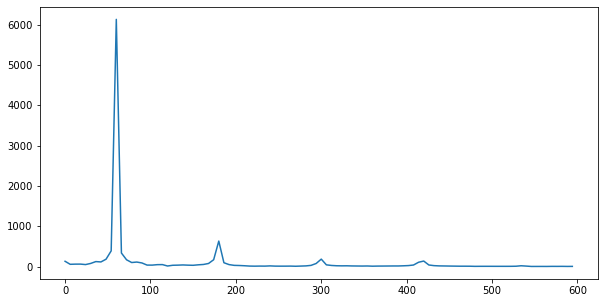

In [10]:
plt.figure(figsize=(10,5))
plt.plot(xf[0:100], np.abs(yf)[0:100])
plt.show()

C:\Users\linco\anaconda3\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<AxesSubplot:>

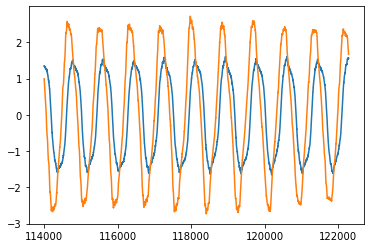

In [11]:
# Comparando as amplitudes ao se comparar o torque de 05 com 40 Nm.
# A intenção é comprovar o que é imaginado fisicamente, sendo quanto maior o torque submetido maior a amplitude.

normal_4b = pd.read_csv('arquivos_csv_barra4/barra_4_torque05_0.csv', index_col=0)
normal_4b = normal_4b.Ia[114000:]

normal_4b_t40 = pd.read_csv('arquivos_csv_barra4/barra_4_torque40_0.csv', index_col=0)
normal_4b_t40 = normal_4b_t40.Ia[114000:]

normal_4b[0:N].plot()
normal_4b_t40[0:N].plot()

In [12]:
# parâmetros para a FFT com 4 barras quebradas.

yf_4b = rfft(normal_4b[0:N].values)
xf_4b = rfftfreq(N, 1 / sample_rate)

yf_4b_t40 = rfft(normal_4b_t40[0:N].values)
xf_4b_t40 = rfftfreq(N, 1 / sample_rate)

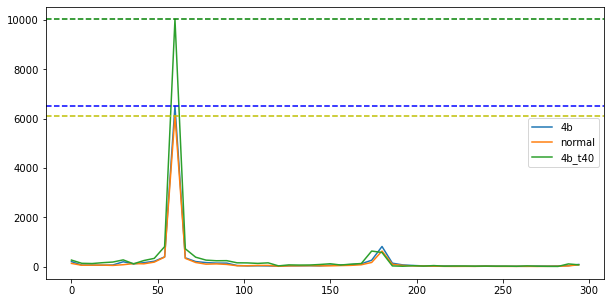

In [13]:
# Plot para auxiliar na visualização das amplitudes comparando torques extremos.

plt.figure(figsize=(10,5))
plt.plot(xf_4b[0:50], np.abs(yf_4b)[0:50], label='4b')
plt.plot(xf[0:50], np.abs(yf)[0:50], label='normal')
plt.plot(xf_4b_t40[0:50], np.abs(yf_4b_t40)[0:50], label='4b_t40')
plt.axhline(y = np.abs(yf_4b_t40)[10], color='g', linestyle='--')
plt.axhline(y = np.abs(yf_4b)[10], color='b', linestyle='--')
plt.axhline(y = np.abs(yf)[10], color='y', linestyle='--')
plt.legend()
plt.show()

In [14]:
xf_4b_t40[0:11]

array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.])

In [15]:
np.abs(yf_4b_t40)[10]

10035.010176944103

Text(0.5, 0, 'Sample')

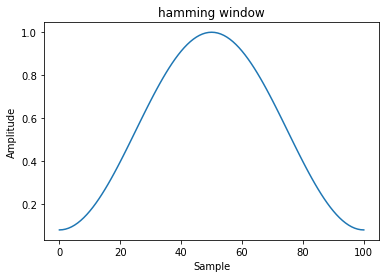

In [16]:
#implementando o janelamento

from scipy import signal
window = signal.windows.hamming(101)
plt.plot(window)
plt.title("hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

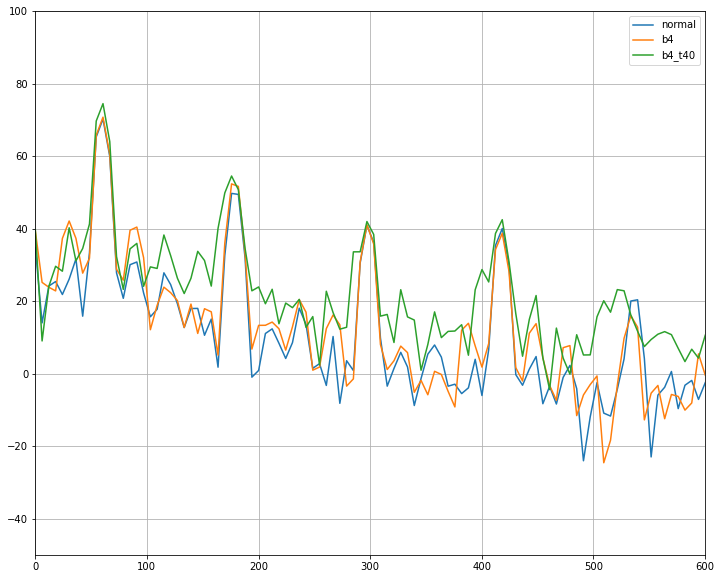

In [17]:
from scipy.signal import get_window

plt.figure(figsize = (12, 10))
n = 8192
w = np.fft.rfft(normal0[0:N].values * get_window('hamming', len(time)), n=n)
freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
plt.plot(freqs, 20*np.log10(np.abs(w)), label='normal')

w = np.fft.rfft(normal_4b[0:N].values * get_window('hamming', len(time)), n=n)
freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
plt.plot(freqs, 20*np.log10(np.abs(w)), label='b4')

w = np.fft.rfft(normal_4b_t40[0:N].values * get_window('hamming', len(time)), n=n)
freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
plt.plot(freqs, 20*np.log10(np.abs(w)), label='b4_t40')

plt.legend()

plt.ylim(-50, 100)
plt.xlim(0, 600)
plt.grid()

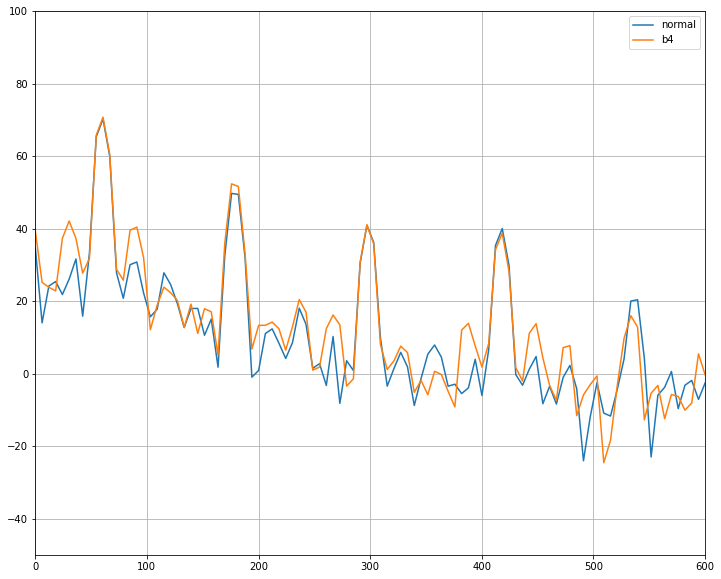

In [18]:
plt.figure(figsize = (12, 10))
n = 8192
w = np.fft.rfft(normal0[0:N].values * get_window('hamming', len(time)), n=n)
freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
plt.plot(freqs, 20*np.log10(np.abs(w)), label='normal')

w = np.fft.rfft(normal_4b[0:N].values * get_window('hamming', len(time)), n=n)
freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
plt.plot(freqs, 20*np.log10(np.abs(w)), label='b4')

plt.legend()

plt.ylim(-50, 100)
plt.xlim(0, 600)
plt.grid()

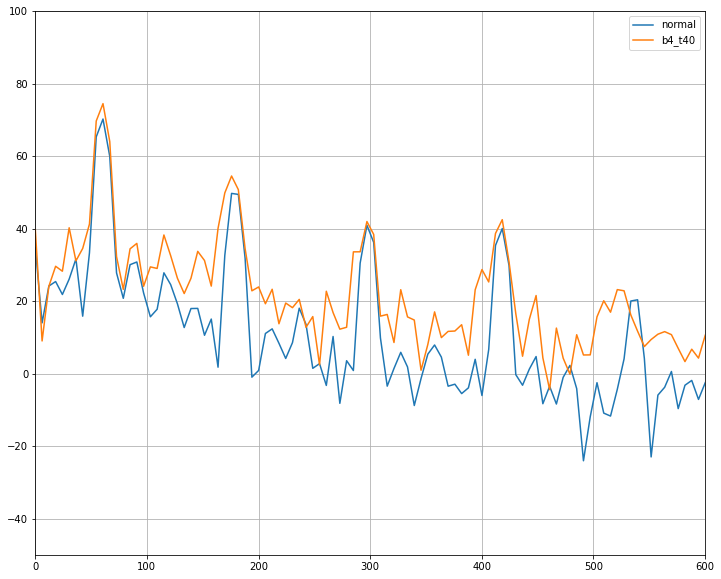

In [25]:
plt.figure(figsize = (12, 10))
n = 8192
w = np.fft.rfft(normal0[0:N].values * get_window('hamming', len(time)), n=n)
freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
plt.plot(freqs, 20*np.log10(np.abs(w)), label='normal')

w = np.fft.rfft(normal_4b_t40[0:N].values * get_window('hamming', len(time)), n=n)
freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
plt.plot(freqs, 20*np.log10(np.abs(w)), label='b4_t40')

plt.legend()

plt.ylim(-50, 100)
plt.xlim(0, 600)
plt.grid()

<Figure size 864x720 with 0 Axes>

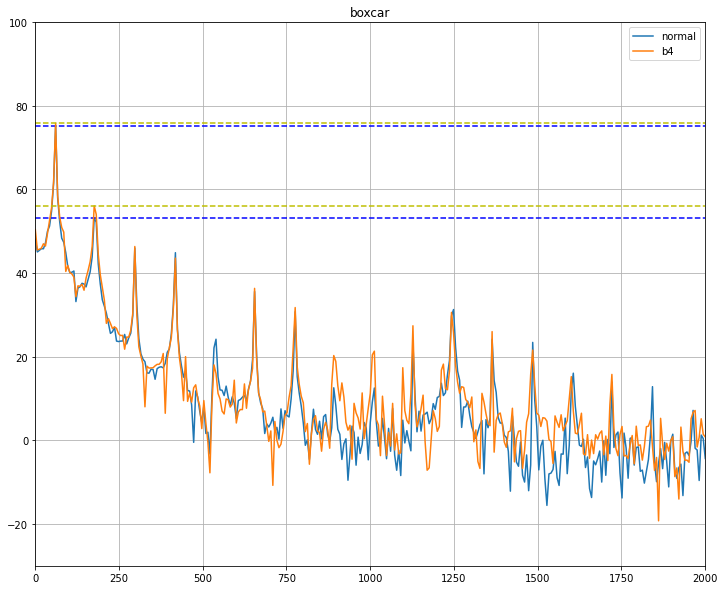

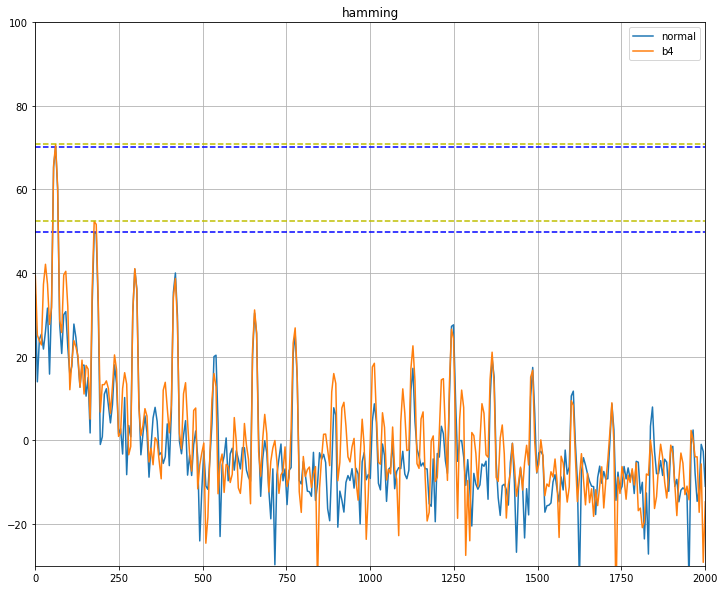

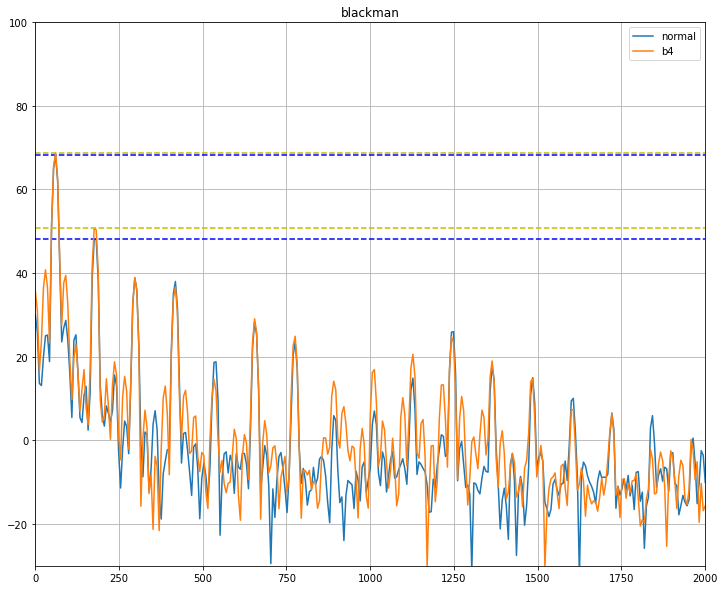

In [23]:
# Comparando os tipos de janelamento

plt.figure(figsize = (12, 10))
for window in ['boxcar', 'hamming', 'blackman']:
    plt.figure(figsize = (12, 10))
    n = 8192
    w = np.fft.rfft(normal0[0:N].values * get_window(window, len(time)), n=n)
    freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
    plt.plot(freqs, 20*np.log10(np.abs(w)), label='normal')
    
    plt.axhline(y = 20*np.log10(np.abs(w))[10], color='b', linestyle='--')
    plt.axhline(y = 20*np.log10(np.abs(w))[29], color='b', linestyle='--')

    w = np.fft.rfft(normal_4b[0:N].values * get_window(window, len(time)), n=n)
    freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
    plt.plot(freqs, 20*np.log10(np.abs(w)), label='b4')
    
    plt.axhline(y = 20*np.log10(np.abs(w))[10], color='y', linestyle='--')
    plt.axhline(y = 20*np.log10(np.abs(w))[29], color='y', linestyle='--')

    plt.title(window)
    plt.ylim(-50, 100)
    plt.xlim(0, 600)
    plt.grid()
    plt.ylim(-30, 100)
    plt.xlim(0, 2000)
    plt.legend()

<Figure size 864x720 with 0 Axes>

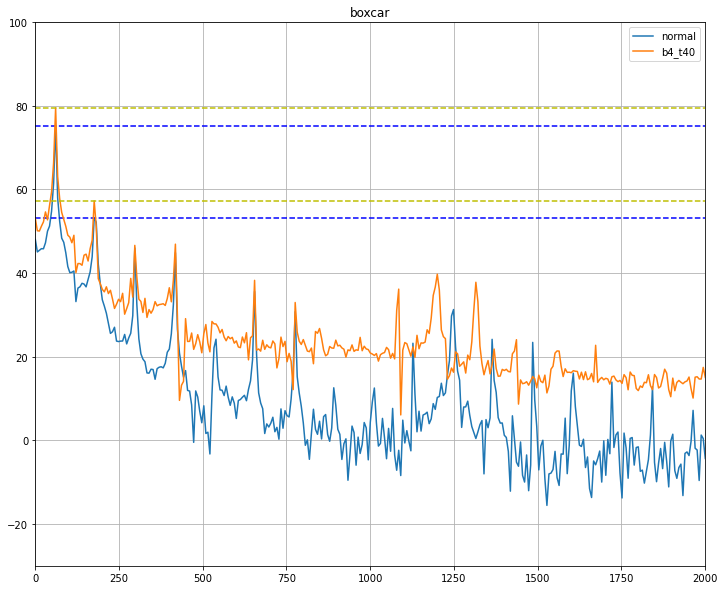

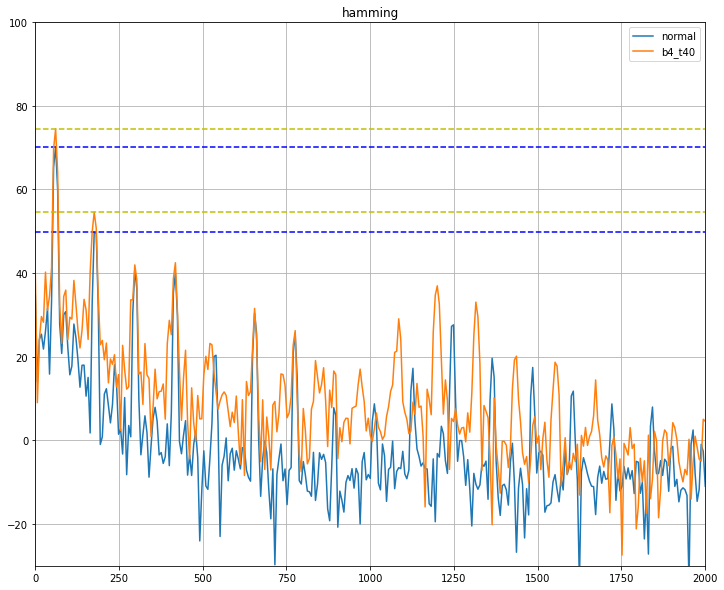

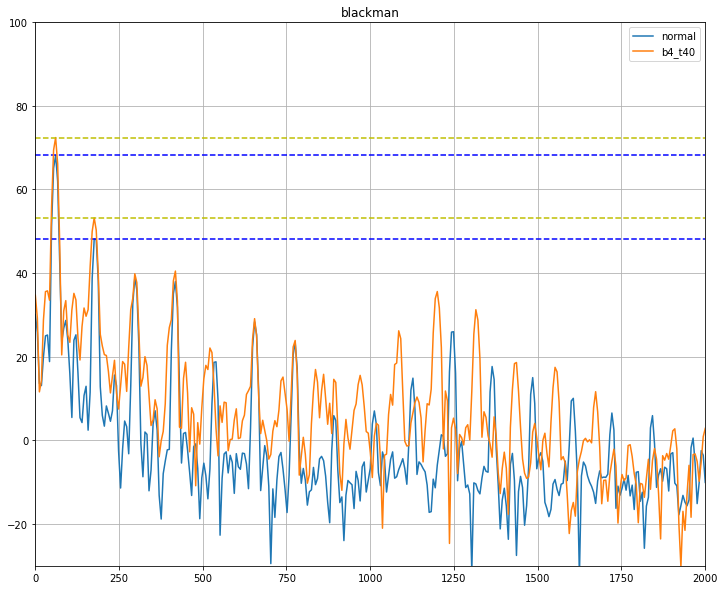

In [24]:
plt.figure(figsize = (12, 10))
for window in ['boxcar', 'hamming', 'blackman']:
    plt.figure(figsize = (12, 10))
    n = 8192
    w = np.fft.rfft(normal0[0:N].values * get_window(window, len(time)), n=n)
    freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
    plt.plot(freqs, 20*np.log10(np.abs(w)), label='normal')
    
    plt.axhline(y = 20*np.log10(np.abs(w))[10], color='b', linestyle='--')
    plt.axhline(y = 20*np.log10(np.abs(w))[29], color='b', linestyle='--')

    w = np.fft.rfft(normal_4b_t40[0:N].values * get_window(window, len(time)), n=n)
    freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
    plt.plot(freqs, 20*np.log10(np.abs(w)), label='b4_t40')
    
    plt.axhline(y = 20*np.log10(np.abs(w))[10], color='y', linestyle='--')
    plt.axhline(y = 20*np.log10(np.abs(w))[29], color='y', linestyle='--')

    plt.title(window)
    plt.ylim(-50, 100)
    plt.xlim(0, 600)
    plt.grid()
    plt.ylim(-30, 100)
    plt.xlim(0, 2000)
    plt.legend()

Para continuar veja o jupyter 3_SFFT...